In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import log, sqrt, exp, pi, cos
from scipy import stats as st
import seaborn as sns
sns.set(color_codes=True)

sns.set_palette(sns.color_palette("Set2"))
sns.set(rc={'figure.figsize':(10,8)}, style="white", color_codes=True)


import warnings
warnings.filterwarnings("ignore")

# Trabajo Prático 1

### Ejercicio 1
Utilizando Matlab, Octave o Python implementar un Generador Congruencial Lineal (GCL) de módulo 
$2^{32}$ , multiplicador 1013904223, incremento de 1664525 y semilla igual a la parte entera del promedio de los números de padrón de los integrantes del grupo.
* Informar los primeros 6 números al azar de la secuencia.
* Modificar el GCL para que devuelva números al azar entre 0 y 1, y realizar un histograma sobre 100.000
valores generados.

---

**Método Lineal Congruente [Lehmer, 1949] **

$U(n) = (a U(n-1) + c)\mod m, \quad n\geq 0$

$m, \quad \text {el módulo};\quad 0<m$

$a,\quad \text{el multiplicador};\quad 0\geq a < m$

$c, \quad \text{el incremento}; \quad 0\geq c < m$

$U_{0}, \quad \text{la semilla, o valor inicial};\quad 0\geq U_{0}< m$

Para generar números al azar entre 0 y 1, dividimos los valores obtenidos con el GCL por $m$


In [3]:
m = 2**32 
a = 1013904223
c = 1664525
U0 = int((94335 + 93784 + 96626)/3)

Un = {}
Un[0] = U0

def U(n):
    if (n in Un) :
        return Un[n]
    else:
        Un[n] = (a*U(n-1) + c) % m
        return Un[n]

# Primeros 6 Números Aleatorios
for i in range(1,7):
    print(U(i))

1683756394
2988766819
1144704458
3893264899
1949204010
1294472611


In [4]:
#100.000 valores random generados entre 0 y 1
randomNums1 = list()
for i in range(0,100000):
    x = U(i+1)
    randomNums1.insert(i,x/m)

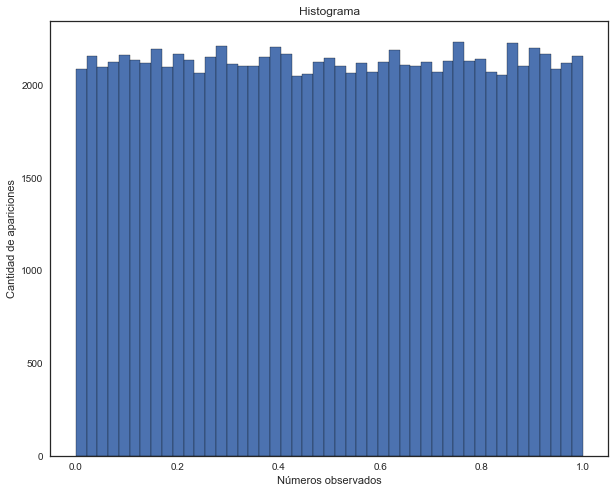

In [5]:
plt.xlabel('Números observados')
plt.ylabel('Cantidad de apariciones')
plt.title('Histograma')

sns.distplot(randomNums1,  kde=False,  hist_kws={'edgecolor':'black', 'alpha':1})
sns.set(style="white", context="talk")

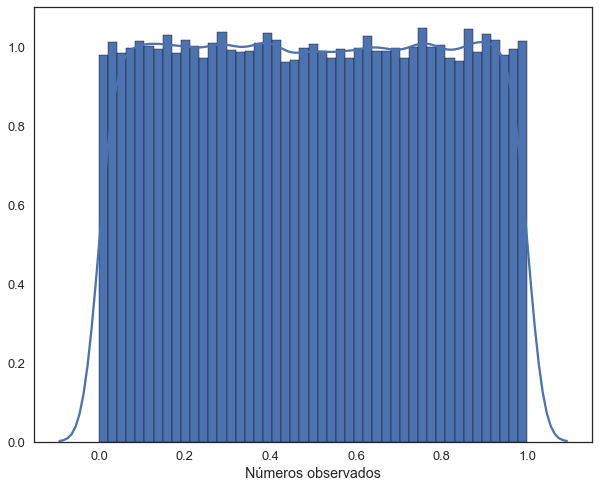

In [6]:
plt.xlabel('Números observados')

sns.distplot(randomNums1,  hist_kws={'edgecolor':'black', 'alpha':1})
sns.set(style="white", context="talk")

### Ejercicio 2
Utilizando el generador de números aleatorios con distribución uniforme [0,1] implementado en el ejercicio 1 y utilizando el método de la transformada inversa genere números pseudoaleatorios con distribución exponencial negativa de media 15.
* Realizar un histograma de 100.000 valores obtenidos.
* Calcular la media, varianza y moda de la distribución obtenida y compararlos con los valores teóricos.

---
*Vamos a generar una variable $X$ con **Distribución Exponencial** a partir de una variable $U$ **Uniforme** utilizando el **Método de la Transformada Inversa** *

---

#### Método de la Transformada Inversa:

Teniendo una función de densidad de probabilidad  $f(x)$, según la cual queremos generar números al azar, y su función de densidad acumulada  $F(x)$,  en este método se elige un número  $U$  aleatorio con distribución uniforme en el intervalo  $[0, 1]$,  se pide que  $F(x)=U$  y se resuelve para obtener  $x=F^{-1}(U)$

Para ello:

* $F(x)$: Función de distribución continua e inversible
* $U$: Variable aleatoria con distribución uniforme $[0, 1]$


**Distribuión Exponencial**

La distribución exponencial es una distribución de probabilidad continua con un parámetro 
$\lambda>0$
 cuya **Función de Densidad** es:
$f(x)= P(x)=\left\{\begin{matrix}
  \lambda e^{-\lambda x} & \quad \text{para } x \ge 0 \\
  0 & \quad \text{en caso contrario}
  \end{matrix}\right.$
  
Y su **Función de Densidad Acumulada** es:

$  F(x)= P(X \le x)=\left\{\begin{matrix}
  0 & \text{para }x < 0 \\
  1-e^{-\lambda x} & \text{para }x \ge 0
  \end{matrix}\right.$
  
La **Media** se puede calcular como:
  
 $E[X]=\frac{1}{\lambda}$
 
y la **Varianza** como:
 
$ V[X]=\frac{1}{\lambda^2}$

en cuanto la **Moda**, para una distribución exponencial siempre es 0.

La **transformada inversa** de la **función de densidad acumulada** se define como:

$X = F_{x}^{-1}(U) = - \frac{1}{\lambda}ln(1-U)$

entendiendo a $X$ como la variable con Distribución Exponencial generada a partir de la uniforme $U$

$U   \underrightarrow{ \quad{F_{x}^{-1}} \quad}   X$

In [52]:
lambdda = 1/15
numsExp2 = list()
n = 100000 #Cantidad de muestras

for i in range(0,n):
    x = (log(1-(randomNums1[i]))/lambdda)*(-1)
    numsExp2.insert(i,x)

print('Varianza = ' + str(np.var(numsExp2)))
print('Media = ' + str(np.median(numsExp2)))
print('Moda = ' + str(st.mode(numsExp2)[0][0]))

Varianza = 225.9273005825936
Media = 10.379580021900171
Moda = 8.081553818275827e-06


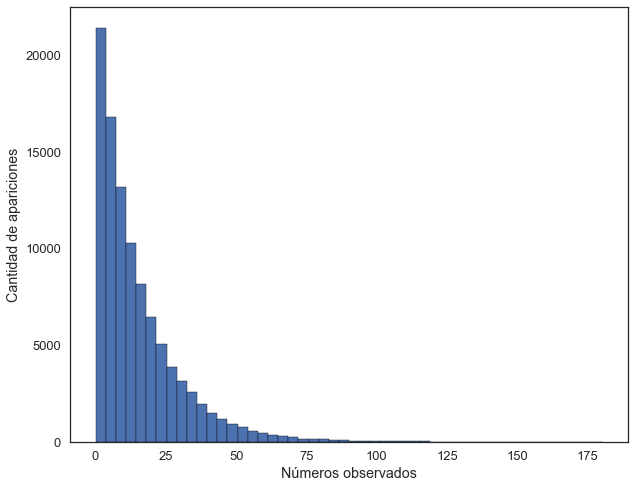

In [8]:
plt.xlabel('Números observados')
plt.ylabel('Cantidad de apariciones')

sns.distplot(numsExp2, kde=False,  hist_kws={'edgecolor':'black', 'alpha':1})
sns.set(style="white", context="talk")

Para el caso que estamos estudiando: 
 
 $\lambda = \frac{1}{15}$
 
 Por lo que teóricamente 
 
 $E[X] = 15,\qquad V[X] = 225, \qquad Moda=0$
 
 La media, varianza y moda obtenidas fueron:
 
 $E[X] = 10.379580021900171,\qquad V[X] = 225.9273005825936,\qquad Moda = 8.081553818275827e-06$


### Ejercicio 3
Utilizando el generador de números aleatorios con distribución uniforme [0,1] implementado en el ejercicio 1 genere números pseudoaleatorios con distribución Normal Standard utilizando el método de la transformada inversa (realizando un muestreo de función de distribución acumulada e interpolándolos linealmente).
* Realizar un histograma de 100.000 valores obtenidos.
* Calcular la media, varianza y moda de la distribución obtenida y compararlos con los valores teóricos.

---

*Vamos a generar una variable $X$ con **Distribución Normal Standard** a partir de una variable $U$ **Uniforme** utilizando el **Método de la Transformada Inversa** *

---

**Distribución Normal**

Una **variable aleatoria continua**, $X$, sigue una **Distribución Normal** de media $\mu$ y desviación típica $\sigma$, y se designa por $N(\mu, \sigma)$, si se cumplen las siguientes condiciones:
1. La variable puede tomar cualquier valor: $(-\infty, +\infty)$
2. La **función de densidad**, es la expresión en términos de ecuación matemática de la curva de **Gauss**:

$f(x) = P(x) = \frac {1} {\sigma\sqrt{2\pi}} \mathrm{e}^{-\frac {1}{2} (\frac {x- \mu}{\sigma})^{2}  }$

La **distribución normal standard** es aquella que tiene por media el valor cero, $\mu = 0$, y por desviación típica la unidad, $\sigma =1$. Por lo que su **función densidad** es:

$f(x) = P(x) = \frac {1} {\sqrt{2\pi}} \mathrm{e}^{-\frac {x^{2}}{2}   }$

Para hallar la  **transformada inversa** de la **función de densidad acumulada** vamos a calcular analíticamente la función inversa a la **función de distribución acumulada**, realizaremos un muestreo $P$ y luego interpolaremos linealmente. Para luego definir a $X$ como la variable con **distribución normal estándar** generada a partir de la **uniforme** $U$

$U   \underrightarrow{ \quad{F_{x}^{-1}} \quad}   X$

In [9]:
from scipy.interpolate import InterpolatedUnivariateSpline
#Muestra de la transformada inversa
P = [
    (0,-5), (0.00135,-3), (0.00621,-2.5), 
    (0.02275, -2), (0.06681, -1.5), (0.11507, -1.2), 
    (0.15866, -1), (0.21186, -0.8), (0.27425, -0.6), 
    (0.34458, -0.4), (0.42074, -0.2), (0.5, 0), 
    (0.57926, 0.2), (0.65542, 0.4), (0.72575, 0.6), 
    (0.78814, 0.8), (0.84134, 1), (0.88493, 1.2), 
    (0.93319, 1.5), (0.97725, 2), (0.99379, 2.5), 
    (0.99865, 3),  (0.99997,4), (1,5)]

xi, yi = zip(*P)  
x = np.linspace(min(xi), max(xi), num=100000)
y1d = np.interp(x, xi, yi)
y1d = InterpolatedUnivariateSpline(xi, yi, k=1)(x)  

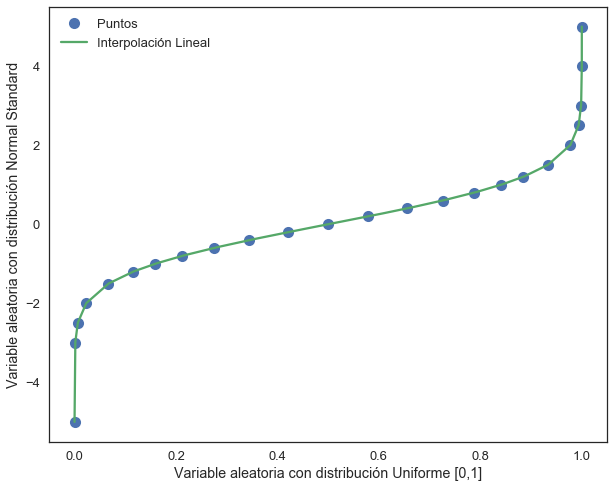

In [10]:
plt.xlabel('Variable aleatoria con distribución Uniforme [0,1]')
plt.ylabel('Variable aleatoria con distribución Normal Standard')
plt.plot(xi, yi, 'o', mew=2)
plt.plot(x, y1d)
leg = plt.legend(['Puntos', 'Interpolación Lineal'])
leg.get_frame().set_facecolor('#fafafa')

In [11]:
def transformadaInversa(x): 
    return np.interp(x,xi,yi)
n = 100000
numsNS = list()
for i in range(0,n):
    numsNS.append(transformadaInversa(randomNums1[i]))

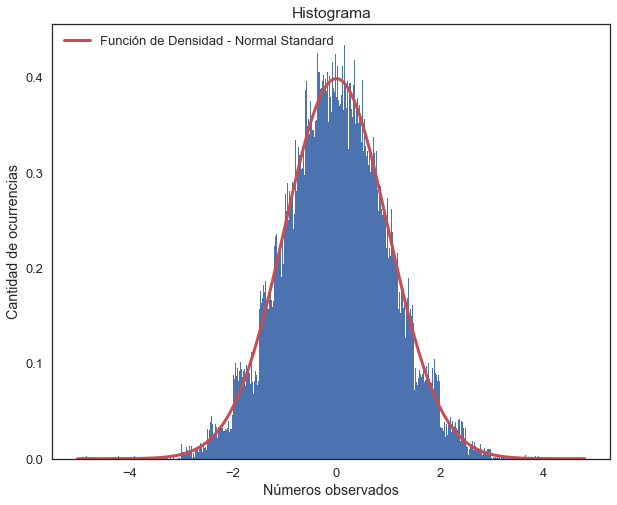

In [12]:
plt.xlabel('Números observados')
plt.ylabel('Cantidad de ocurrencias')
plt.title("Histograma")
sigma = 1
mu = 0

count, bins, ignored = plt.hist(numsNS, 1000, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=3, color='r', label='Función de Densidad - Normal Standard')
plt.legend()

In [13]:
print('Media = ' + str(np.median(numsNS)))
print('Varianza = ' + str(np.var(numsNS)))
print('Moda = ' + str(st.mode(numsNS)[0][0]))

Media = -0.001483560376923987
Varianza = 1.03475188374584
Moda = -4.999201822060126


Los valores teóricos para una Distribución Normal Standard son: 

$E[x]= 0,\qquad V[x]= \sigma ^{2} = 1  ,\qquad Moda=0$ 

Los valores obtenidos fueron: 

$E[x]=-0.001483560376923987 ,\qquad V[x]=1.03475188374584 ,\qquad Moda=-4.999201822060126$ 



### Ejercicio 4
Genere 100.000 números aleatorios con distribución Normal de media 35 y desvío estándar 5 utilizando el algoritmo de Aceptación y Rechazo.
* Realizar un histograma con todos los valores obtenidos.
* Comparar, en el mismo gráfico, el histograma realizado en el punto anterior con la distribución normal brindada por Matlab u Octave.
* Calcular la media, varianza y moda de la distribución obtenida y compararlos con los valores teóricos.

---
**Método de Aceptación o Rechazo**

Este método consiste en generar números aleatorios, utilizando una función de distribución de probabilidades simple de generar, aceptarlos o no en función de una probabilidad de forma que los valores aceptados sigan la ley de probabilidades que se desea generar. Generalmente es utilizado cuando solo se conoce la función de densidad y no se puede aplicar el método de la transformada inversa a su distribución acumulada.

**Método de aceptación o rechazo para variables contínuas**

Partiendo de la función de distribución de probabilidades $Y(t)$ deseamos obtener números aleatorios que sigan la función de distribución de probabilidades $X(t)$

1. Encontrar un función de distribución de probabilidad $Y(t)$ para la cual $Y(t) > 0 \Leftrightarrow X(t) > 0$.
2. Considerar una constante $c$ tal que $\frac{X(t)}{Y(t)}\leq c$.
3. Utilizando $Y(t)$ generamos un número aleatorio $j$.
4. Generamos una variable aleatoria $u$ con distribución uniforme.

*Si $u < \frac{X(t)}{cY(t)} $ entonces aceptamos que $j$ como generado según la ley de probabilidades $X(t)$ sino calculamos
otro $j$*

---
Nosotros, con este método, queremos generar números aleatorios que sigan una distribución Normal de media 35 y desvío estándar 5, $N(35,5)$.

---
1. Encontramos Y(t):

    Teniendo como **Función de distribución de probabilidades Normal  $X(t)$:**

    $X(t) = \frac {1} {\sigma\sqrt{2\pi}} \mathrm{e}^{-\frac {1}{2} (\frac {x- \mu}{\sigma})^{2}  }$

    para una normal de media 35 y desvío 5:

    $X(t) = \frac {1} {5\sqrt{2\pi}} \mathrm{e}^{-\frac {1}{2} (\frac {t- 35}{5})^{2}  }$

    *Como queremos conseguir una $Y(t)$ conocida que se ajuste razonablemente bien a la función normal*, y como queremos que $Y(t) > 0 \Leftrightarrow X(t) > 0$, debemos utilizar una función que abarque todo el dominio de t.

    Si consideramos:

    $X(t) = \frac {1} {5\sqrt{2\pi}} \mathrm{e}^{-\frac {1}{2} (\frac {t- 35}{5})^{2}  } \text{   para   }0<t<\infty$

    Podemos utilizar $Y(t)= \mathrm{e}^{-t}$ para $0<t<\infty$ y una vez que hayamos generado nuestra variable $X$ la multiplicaremos por $-1$ con probabilidad $0.5$ para transformar el dominio de $t$ a $-\infty<t<\infty$.

2. Determinamos $c$

    Vamos a considerar 
    $\max_t \{\frac{X(t)}{Y(t)}\} = \max_t \{\frac{\frac {1} {5\sqrt{2\pi}} \mathrm{e}^{-\frac {1}{2} (\frac {t - 35}{5})^{2}  }}{\mathrm{e}^{-t}}\} = \max_t \{\frac {1} {5\sqrt{2\pi}} \mathrm{e}^{t-\frac {1}{2} (\frac {t - 35}{5})^{2}  }\}$.
    
    $\frac {1} {5\sqrt{2\pi}} \mathrm{e}^{t-\frac {1}{2} (\frac {t - 35}{5})^{2}  }$  será máximo cuando ${t-\frac {1}{2} (\frac {t - 35}{5})^{2}  }$ lo sea.

    $\frac{d \lgroup {t-\frac {1}{2} (\frac {t - 35}{5})^{2}  } \rgroup}{dt} = 1 - \frac{t-35}{5} \Rightarrow t= 40\Rightarrow  c \geq \frac{X(40)}{Y(40)} \Rightarrow \text{  utilizamos  } c = \frac {1} {5\sqrt{2\pi}} \mathrm{e}^{\frac {79}{2}  }$
    
3. Para generar un número aleatorio j utilizamos la función inversa de $Y(t)$ y un número $t$ aleatorio

    $j = Y^{-1}(t) = -ln(1-t) $
    
4. Generamos $u$ variable aleatoria con distribución uniforme para definir la aceptación


In [ ]:
c = exp(79/2)*(1/(5*(sqrt(2*pi))))

n = 100000
aceptados = list() #VALORES ACEPTADOS SEGUN DISTRIBUCIÓN NORMAL, MEDIA 35 Y DESVÍO 5

#NORMAL DE MEDIA 35 Y VARIANZA 25
def X(t):
    return ((exp(-0.5*(((t-35)/5)**2)))/(5*sqrt(2*pi)))

def Y(t):
    return exp(-t)

#PROBABILIDAD DE ACPTAR EL VALOR GENERADO
def prob(t):
    return (X(t)/(c*Y(t)))

for i in range(0,n):
    u = np.random.rand();
    #Utilizamos el método de la transformada inversa para calcular la exponencial j
    j = (log(1-(np.random.rand())))*(-1);

    if(u >= prob(j)):
        if(u >= 0.5):
            aceptados.append(j )
        else:
            aceptados.append(-1*j)

print('Varianza = ' + str(np.var(aceptados)))
print('Media = ' + str(np.median(aceptados)))
print('Moda = ' + str(st.mode(aceptados)[0][0]))

Varianza = 2.0124469585425526
Media = 0.000968186884796423


In [ ]:
plt.xlabel('Números observados')
plt.ylabel('Cantidad de apariciones')

sigma = 5
mu = 35

sns.distplot(aceptados, kde=False,  hist_kws={'edgecolor':'black', 'alpha':1})
sns.set(style="white", context="talk")

Comparar, en el mismo gráfico, el histograma realizado en el punto anterior con la distribución normal brindada por Matlab u Octave.

In [ ]:
# mu, sigma = 35, 5 # media y desvio estandar
# muestra = list()

# datos = list()
# for i in range(0, n):
#     datos.append(st.norm(mu, sigma).pdf(Un[i]/m))

In [ ]:
# # histograma de distribución normal.
# plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
# np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
# cuenta, cajas, ignorar = plt.hist(datos, 1)
# plt.ylabel('frequencia')
# plt.xlabel('valores')
# plt.title('Histograma')
# plt.show()

Los valores teóricos son: 

$E[x]=35 ,\qquad V[x]= 25,\qquad Moda=35$ 

Los valores obtenidos son: 

$E[x]=-0.00290031429010464 ,\qquad V[x]=1.9864006349728753 ,\qquad Moda=-11.152293604303189$ 


### Ejercicio 5
Utilizando el método de la transformada inversa y utilizando el generador de números aleatorios implementado en el ejercicio 1 genere números aleatorios siguiendo la siguiente función de distribución de probabilidad empírica.

| Probabilidad | Valor generado |
| --- | --- |
| 0.5 | 1 |
| 0.2 | 2 |
| 0.1 | 3 |
| 0.2 | 4 |


In [ ]:
def transformadaInversa(u):
  if (u <= .5):
    return 1
  elif (u > .5 and u <= .7):
    return 2
  elif (u > .7 and u <= .8):
    return 3
  elif (u > .8 and u <= 1):
    return 4

nums5 = list()
for i in range(100000):
    nums5.append(transformadaInversa(randomNums1[i]))

In [ ]:
plt.xlabel('Números observados - (1,2,3,4)')
plt.ylabel('Cantidad de apariciones')
sns.distplot(nums5,  kde=False, bins=4,
                  hist_kws={'edgecolor':'black', 'alpha':1})
sns.set(style="white")

En el gráfico anterior se puede distinguir el comportamiento esperado. 
Tomamos 100k muestras en las cuales, aproximadamente obtuvimos:

1 en 50k muestras$  ,\qquad P(1) \approx 0.5$.

2 en 20k muestras  $  ,\qquad P(2) \approx 0.2$.

3 en 10k muestras  $  ,\qquad P(3) \approx 0.1$.

4 en 20k muestras  $  ,\qquad P(4) \approx 0.2$.

### Ejercicio 6
Considerar el siguiente experimento:
Lanzar una moneda tantas veces como sea necesario hasta obtener cara.
Realizar el experimento 10000 veces indicando:
* ¿A qué tipo de proceso corresponde cada uno de los lanzamientos?
* Con qué distribución conocida se puede modelar cada uno de los experimentos.
* Realizar un histograma mostrando la distribución obtenida

---
* Cada uno de los lanzamientos corresponde a un proceso de **Bernoulli dicotómico** donde los únicos resultados    posibles son éxito o fracaso, en este caso el éxito es obtener cara y el fracaso ceca.
* El experimento de arrojar una moneda n veces hasta obtener cara corresponde a una distribucion **Geométrica** la cual indica el número de experimentos, en este caso lanzamientos, hasta obtener  el primer éxito, sacar cara.

In [ ]:
nums6 = list()
for i in range(0,10000):
    nums6.insert(i,np.random.geometric(0.5))

In [ ]:
plt.title('Hstograma de la distribucion Geométrica - 10000 experimentos',fontsize = 16)
plt.xlabel('Números observados')
plt.ylabel('Cantidad de apariciones')

sns.distplot(nums6, kde=False, bins=13, hist_kws={'edgecolor':'black', 'alpha':1})
sns.set(style="white", context="talk")

### Ejercicio 7
Realizar, sólo gráficamente, un test espectral en 2 y 3 dimensiones al generador conguencial lineal implementado en el ejercicio 1. ¿Cómo se distribuyen espacialmente los puntos obtenidos?

In [ ]:
xs = []
ys = []
for i in range(0,100000-1):
    xs.append(Un[i]/m)
    ys.append(Un[i+1]/m)

xs3d = []
ys3d = []
zs3d = []
for i in range(0,100000-2):
    xs3d.append(Un[i]/m)
    ys3d.append(Un[i+1]/m)
    zs3d.append(Un[i+2]/m)

In [ ]:
df=pd.DataFrame({'x': xs, 'y': ys })
sns.lmplot('x', 
           'y', 
           data=df,
           size=10, scatter_kws={"marker": "D", "s": 2}
          )

plt.title("Test espectral en 2 dimensiones");

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

df=pd.DataFrame({'X': xs3d, 'Y': ys3d, 'Z': zs3d})
 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'],  s=2)
plt.title("Test espectral en 3 dimensiones")
plt.show()

In [ ]:
sns.jointplot(np.array(xs),  np.array(ys), kind="hex", size=10).set_axis_labels("x", "y");

In [ ]:
sns.jointplot(np.array(xs),  np.array(ys), kind="kde",size=10, space=0, color="b")

Los gráficos anteriores se realizaron para detectar patrones. No identificamos patrones claros en la distrubución espacial de los puntos. Lo que implicaría que son números realmente aleatorios

### Ejercicio 8
Realizar un test $Chi^{2}$ a la distribución empírica implementada en el Ej 6. Analizar el resultado para un nivel de significación 0,01.

---
El **Test Estadístico $Chi^{2}$** se aplica cuando tenemos una muestra de una **variable aleatoria discreta finita** y queremos evaluar si responde a una determinada distribución de probabilidad teórica.

En este caso vamos a ver si la muestra que se generó en el ejercicio 6, responde a una **distribución geométrica** .

Primero se debe medir la dispersión de las ocurrencias observadas $N_{i}$ respecto de las esperadas ( $np_{i}$ ):

<h3 align="center">$
D^{2} = \sum_{k=1}^{K-1}\frac {(N_{i} - np_{i})^{2}}{np_{i}}
$</h3> 

**Pearson** (1900) demostró que $D^{2}$ responde a una distribución de tipo $Chi^{2}$, por lo tanto, encontramos $\textbf{t}$ tal que  $P(D^{2} > t) = \alpha$  y aceptamos la hipótesis siempre que $D^{2} < t$.




In [ ]:
n = 10000

d2 = 0

valores, ocurrencias = np.unique(nums6, return_counts=True)

k = len(valores) #CANTIDAD DE VALORES DIFERENTES 

def probabilidadGeometrica(x):
    return 0.5*(0.5**(x-1))

for i in range(0,k):
    d2 += ((ocurrencias[i] - n*(probabilidadGeometrica(valores[i])))**2)/(n*(probabilidadGeometrica(valores[i])))
    
print('Valores obtenidos: ' )
print(valores)
print(ocurrencias)
print('Cantidad de valores obtenidos diferentes: ' + str(k))
print('D2 = ' + str(d2))

Encontramos que nuestro $D^{2} = 19.5159423828125$  .

Con un nivel de significación de $1\%$, $\alpha = 0.01$, y una cantidad de diferentes valores $k$, $k=15$, buscamos en la tabla $Chi^{2}$ guiándonos por  $\alpha = 0.01$ y grados de libertad  $v = k-1 = 14 $,  tenemos  $t = 29,1$.

---
Como $D^{2} < t$, entonces **aceptamos la hipótesis** diciendo que los datos responden a una distribución geométrica, considerando un error del $1\%$.

---

![Tabla Chi2](chi2.png)

### Ejercicio 9
Al generador congruencial lineal implementado en el ejercicio 1 realizarle un gap test para los siguientes intervalos:

| Intervalo 1 | Intervalo 2  |
|--|
| 0.2 - 0.6 | 0.5 - 1|

Analizar los resultados con un nivel de significación del 5%.

---

**Gap Test**: Siendo $U_{i}$ un número aleatorio con **distribución uniforme** en un rango $[0,1]$ y $0 \leq \alpha < \beta \leq 1$. Este test consiste en contar la cantidad de números aleatorios generados de forma consecutiva entre la generación de un número que pertenece al intervalo $[\alpha, \beta]$ y el próximo número generado que vuelve a pertenecer al intervalo.

Entendemos como gap al espacio entre dos apariciones consecutivas de números pertenecientes al intervalo $[\alpha, \beta]$.

La probabilidad teórica de apariciones de tamaño de gaps es:

$P(tamanioDeGap = 0) = p = \beta - \alpha $ 

$P(tamanioDeGap = 1) = p(1-p)$

$...$

$P(tamanioDeGap = t) = p(1-p)ˆt$

La distribución de frecuencia teórica es:

$ P(tamanioDeGap \leq t) = F(t) = p\sum_{n=1}^{t} (1-p)^{n} = 1-(1-p)^{t+1}$


---
Tomamos:

$\alpha=0.2,\qquad  \beta=0.6$

y queremos analizar un total de 100 gaps.

In [ ]:
def perteneceAlIntervalo(num, alpha, beta):
    return (num>=alpha and num<=beta)

def encontrarGaps(n, alpha, beta):
    primerGap = False
    gapTamanio = 0
    gaps = list()
    i=0
    while(len(gaps) <= n):
        if(not perteneceAlIntervalo(Un[i]/m, alpha, beta)): 
            gapTamanio+=1
        if (perteneceAlIntervalo(Un[i]/m, alpha, beta) and primerGap == False):
            primerGap = True
        if (perteneceAlIntervalo(Un[i]/m, alpha, beta) and primerGap):
            gaps.append(gapTamanio)            
            if (not perteneceAlIntervalo(Un[i-1]/m, alpha, beta)):
                gapTamanio = 0
        i+=1
    gaps = gaps[1:] 
    return gaps

gaps = encontrarGaps(100,0.2,0.6)
tamaniosGaps, ocurrencias = np.unique(gaps, return_counts=True) 

print("Gaps encontrados: " +  str(len(gaps)))
print("Tamaños de gaps encontrados: "+ str(len(tamaniosGaps)))
print(tamaniosGaps)
print("Frecuencia: ")
print(ocurrencias)

Para 100 gaps encontrados:

| Tamaño de gap | Apariciones  | Probabilidad Obtenida | Probabilidad Teórica 
|--|
| 0 | 36| 0.36 |0.4|
| 1 | 29| 0.29|0.24|
| 2 | 14 | 0.14|0.144|
| 3 | 10| 0.1|0.0864|
| 4 | 6| 0.06|0.0518|
| 5 | 2| 0.02|0.0311|
| 6 | 1| 0.01|0.0187|
| 7 | 1| 0.01|0.0112|
| 10 | 1| 0.01|0.0024|

Ahora realizamos el **Test Estadístico $Chi^{2}$** para los datos obtenidos en el gap test:

Primero medimos la dispersión de las ocurrencias observadas $N_{i}$ respecto de las esperadas ( $np_{i}$ ):

<h3 align="center">$
D^{2} = \sum_{k=1}^{K-1}\frac {(N_{i} - np_{i})^{2}}{np_{i}}
$</h3> 



In [ ]:
d2 = 0
tamanioFrecuencia = dict(zip(tamaniosGaps, ocurrencias)) 
pi = {0 : 0.4,
      1 : 0.24,
      2 : 0.144,
      3 : 0.0864,
      4 : 0.0518,
      5 : 0.0311,
      6 : 0.0187,
      7 : 0.0112,
      10 : 0.0024}
n = 100

for key in tamanioFrecuencia:
    d2 += ((tamanioFrecuencia[key] - n*(pi[key]))**2)/(n*(pi[key]))

print('D2 = ' + str(d2))

Siguiendo lo desarrollado en el ejercicio 8

Encontramos que nuestro $D^{2} = 5.017115602911896$  .

Con un nivel de significación del $5\%$, $\alpha = 0.05$, y una cantidad de diferentes valores k, $k=9$, buscamos en la tabla $Chi^{2}$ guiándonos por  $\alpha = 0.05$ y grados de libertad  $v = k-1 = 8 $,  tenemos  $t = 2,7$.

Como $D^{2} > t$, entonces **rechazamos la hipótesis** diciendo que los datos no responden a una distribución uniforme, considerando un error del $5\%$.

---
Tomamos:

$\alpha=0.5,\qquad  \beta=1$

y queremos analizar un total de 100 gaps.

In [ ]:
gaps = encontrarGaps(100,0.5,1)
tamaniosGaps, ocurrencias = np.unique(gaps, return_counts=True) 

print("Gaps encontrados: " +  str(len(gaps)))
print("Tipos de gaps encontrados: "+ str(len(tamaniosGaps)))
print(tamaniosGaps)
print("Frecuencia: ")
print(ocurrencias)

Para 100 gaps encontrados:

| Tamaño de gap | Apariciones  | Probabilidad Obtenida | Probabilidad Teórica 
|--|
| 0 | 47| 0.47 |0.5|
| 1 | 31| 0.31|0.25|
| 2 | 10 | 0.1|0.125|
| 3 | 5| 0.05|0.0625|
| 4 | 2| 0.02|0.0312|
| 5 | 2| 0.02|0.0156|
| 7 | 1| 0.01|0.0039|
| 8 | 1| 0.01|0.0019|
| 9 | 1| 0.01|0.0010|


Ahora realizamos el Test Estadístico $Chi^{2}$ para los datos obtenidos en el gap test:




In [ ]:
d2 = 0
tamanioFrecuencia = dict(zip(tamaniosGaps, ocurrencias)) 
pi = {0 : 0.5,
      1 : 0.25,
      2 : 0.125,
      3 : 0.0625,
      4 : 0.0312,
      5 : 0.0156,
      7 : 0.0039,
      8 : 0.0019,
      9 : 0.0010}
n = 100

for key in tamanioFrecuencia:
    d2 += ((tamanioFrecuencia[key] - n*(pi[key]))**2)/(n*(pi[key]))

print('D2 = ' + str(d2))

Encontramos que nuestro $D^{2} = 15.403414304993253$  .

Con un nivel de significación del $5\%$, $\alpha = 0.05$, y una cantidad de diferentes valores k, $k=9$, buscamos en la tabla $Chi^{2}$ guiándonos por  $\alpha = 0.05$ y grados de libertad  $v = k-1 = 8 $,  tenemos  $t = 2,7$.

Como $D^{2} > t$, entonces **rechazamos la hipótesis** diciendo que los datos no responden a una distribución uniforme, considerando un error del $5\%$.

### Ejercicio 10
Aplicar el test de Kolmogorov-Smirnov al generador de números al azar con distribución normal generado en el ejercicio 4, y analizar el resultado del mismo para un nivel de significación 0,01.

Graficar la distribución acumulada real versus la distribución empírica.

---
**Test Estadístico Kolmogorov-Smirnov**

Definimos $H_{0}:$ Las n observaciones dadas siguen una distribución M

Las n observaciones ${x_1, x_2, ..., x_n}$ (ordenadas) de una variable continua $X$, obtenemos una aproximación empírica a la **función acumulativa**:

$F(X) \approx \widehat{F}(x) = \frac{\#x_{i}\leq x}{n} $

Método: medimos la **distancia a la distribución real**:

$q = max_{x}\mid\widehat{F}(x) - F(x) \mid$

Debemos rechazar la hipótesis $H_{0}$ si $q > c$, el cual se
determina a partir de un **nivel de significación** $\alpha$:

$\alpha = P[q > c \mid H_{0}] = 1 - \mathrm{e}^{-2nc^{2}}$

Conclusión: se acepta $H_{0}$ si:

$q > \sqrt{-\frac{1}{2n}ln(\frac{\alpha}{2})}$

En nuestro caso queremos probar $H_{0}:$

$H_{0}$: los números al azar generados en el ejercicio 4  siguen una **distribución normal** de media 35 y desvío estándar 5

para un nivel de significación 0,01.

In [ ]:
n = 100000 #cantidad de observaciones
numsGauss.sort()

def funcionAcumulativaTeorica(x):
    return st.norm(35, 5).cdf(x)

q = 0
for i in range(n):
    x = (i+1)/n
    y = funcionAcumulativaTeorica(numsGauss[i])
   

    if abs(x-y) > q:
        q = x
        
print('q: ' + str(q))

In [ ]:
alfa = 0.01
c = sqrt((-1/(2*n))*log(alfa/2))

print('c: ' + str(c))

Con $q = 1.0 ,\quad c=0.005146997846583986$

como $q > c, \quad$ **aceptamos $H_{0}$**